In [65]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K
from keras import optimizers, regularizers
from keras import activations
from keras import callbacks
import keras
from vis.utils import utils
from keras.callbacks import ModelCheckpoint
import numpy as np
import glob as glob
from skimage import color
from skimage import io
from skimage import exposure
from skimage import filters
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.applications import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

In [39]:
# dimensions of our images.
img_width, img_height = 512, 512

train_data_dir = '../data/resized_raw'
validation_data_dir = '../data/test_resized_raw'
nb_train_samples = int(len(glob.glob(train_data_dir+'/*/*.png')))
nb_validation_samples = int(len(glob.glob(validation_data_dir+'/*/*.png')))
epochs = 150
batch_size = 4

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [40]:
def preprocess_img(img):
    img = img.astype(np.float32) / 255.0
    return img

In [41]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_img, 
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_img)

In [42]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 429 images belonging to 2 classes.


In [43]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle = False,
    class_mode='categorical')

Found 142 images belonging to 4 classes.


In [66]:
model=keras.applications.xception.Xception(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)


91594752/91884032 [============================>.] - ETA: 0s

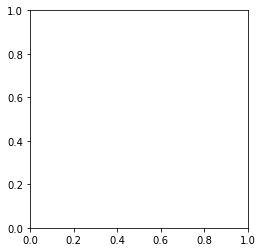

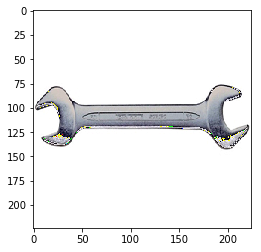

In [77]:
img_path='../data/9ea2bfc9-0c41-4e15-be6d-a5db02e0636f.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.figure()
plt.imshow(x[0,:,:,:])
plt.show()

In [78]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=10)[0])

Predicted: [('n03804744', 'nail', 0.45840451), ('n04153751', 'screw', 0.33008128), ('n03255030', 'dumbbell', 0.10574903), ('n02790996', 'barbell', 0.059769575), ('n03532672', 'hook', 0.01362863), ('n03481172', 'hammer', 0.0074637616), ('n03109150', 'corkscrew', 0.0047271634), ('n04376876', 'syringe', 0.0045921723), ('n01494475', 'hammerhead', 0.0037851839), ('n03141823', 'crutch', 0.0021987557)]
